## Transaction details of company XYZ from 2010 to 2011

This exploratory analysis seeks to answer the following:
- The general sales trend of company XYZ betwn December 1, 2010 to Septemcer 12, 2011.
- The country with the most sales
- The countries where more expensive items are purchased 
- The best selling items

### Importing Libraries needed for analysis and visualizations 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser
import re

#set jupyter to display up to 50 columns, so we can see evrything
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)

sns.set_palette('hls')
#show figures in notebook
%matplotlib inline 

###  Loading dataset to be used for analysis (ecommerce_data.csv)

In [4]:
data= pd.read_csv('ecommerce_data.csv', encoding = 'unicode_escape')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.shape

(541909, 8)

The dataset has 541,909 rows/observations and 8 columns/features 

### Data Cleaning

#### Checking for missing values

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
#Changing the datatype of InvoiceDate column to datetme
data["InvoiceDate"]= pd.to_datetime(data["InvoiceDate"])

In [9]:
#To delete NaN rows
data.dropna(inplace= True)

In [10]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
#Checking for duplicates
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 406829, dtype: bool

In [12]:
#To count duplicates in the dataset
data.duplicated().sum()

5225

In [13]:
#Extracting duplicate rows
data.loc[data.duplicated(keep= 'first'), :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [14]:
#Dropping duplicate rows
#data.drop_duplicates(inplace=True, keep = 'first')
#Decided to keep the duplicates of 5268 rows (which is relatively significant) 
#as I cannot ascertain for sure if the duplicates are indeed errors

In [73]:
#checking thr properties of the data set after carrying ouy data cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397922 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397922 non-null  object        
 1   StockCode    397922 non-null  object        
 2   Description  397922 non-null  object        
 3   Quantity     397922 non-null  int64         
 4   InvoiceDate  397922 non-null  datetime64[ns]
 5   UnitPrice    397922 non-null  float64       
 6   CustomerID   397922 non-null  float64       
 7   Country      397922 non-null  object        
 8   TotalPrice   397922 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 38.4+ MB


No more rows containing null values and data type of 'InvoiceDate' is now datetime, this would be helpful during analysis.

#### Sanity checks

In [16]:
data.Country.nunique()

37

In [17]:
#Checking the unique valeus of columns with categorical data
data.Country.nunique()

data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

Dataset covers data from 37 countries listed above

#### Droping negative values in 'Quantity' and 'UnitPrice' columns

In [74]:
data.drop(data[data['Quantity'] < 0].index, inplace = True)
data.drop(data[data['UnitPrice'] < 0].index, inplace = True)

### Desciptive statistics of dataset

In [75]:
#Statistical summary of numrical columns: 'Quantity', 'UnitPrice' and 'Customer ID'
data.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,397922.000000,397922.000000,397922.000000,397922.000000
mean,13.021846,3.116171,15294.314248,22.394656
std,180.420662,22.096843,1713.174133,309.056350
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


The following insights can be drawn from the table above:
- The highest quantity of an item bought in single purchase is 80,995
- The high values of the standard deviation seems to suggest that the dataset has  wide range of variationand hence could contain outliers.
- There are no missing values in the 'Quantity', 'UnitPrice' and 'CustomerID' columns, which is good!

In [76]:
#Summary of the object or categorical columns by first creating a variable that holds such columns
object_col = data.dtypes[data.dtypes=='object'].index
data[object_col].describe()

,InvoiceNo,StockCode,Description,Country
count,397922,397922,397922,397922
unique,18536,3665,3877,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2035,2028,354343


The table above shows:
- The number of unique values of each of the columns, for exampple we can tell that this dataset repesents data fom 38 countries since the 'Country' column has 37 unique values.
- Most sales were made in United Kingdom (91% of total sales)  

### Exploratory Data Analysis and Visualization

In [77]:
#Creating a new column 'TotalPrice' in the the original data set
data['TotalPrice']= data['Quantity']* data['UnitPrice']
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


#### Dealing with Outliers

<AxesSubplot:ylabel='TotalPrice'>

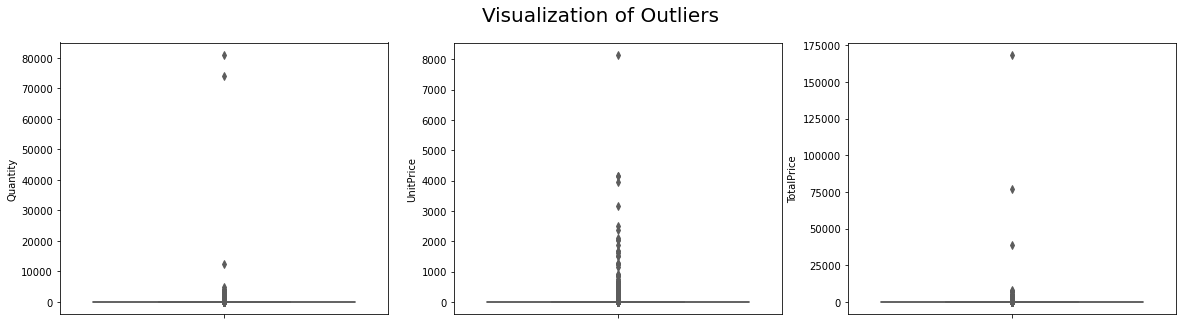

In [78]:
#Detecting outliers using boxplot
#Plotting a boxplot with three axes of 'Quantity', 'UnitPrice' and 'TotalPrice'
out = plt.figure(figsize = (20,5))
out.suptitle("Visualization of Outliers", size = 20)

axis1 = out.add_subplot(1,3,1)
sns.boxplot(data= data, y = "Quantity")

axis2 = out.add_subplot(1,3,2)
sns.boxplot(data= data, y = "UnitPrice")

axis3 = out.add_subplot(1,3,3)
sns.boxplot(data= data, y = "TotalPrice")

It is obvious that the 'Quantity', 'UnitPrice' and 'TotalPrice' columns all have outliers with datapoints very far away from the median.

In [79]:
#Printing out the outliers
out_row= np.where(data['TotalPrice']>= 25000)
out_row

(array([ 37126, 155418, 397449], dtype=int64),)

In [ ]:
#removing outlier
data.drop(out_row[0], inplace = True)

In [61]:
data.shape

(397922, 9)

#### Sales Trend
Determining the sales trend over time using the 'TotalPrice' and 'InvoiceDate' columns

In [ ]:
#Creating sales trend dataframe
sales_trend = pd.DataFrame({'Date' : (data['InvoiceDate']), 'TotalPrice' : (data['TotalPrice'])})
sales_trend= sales_trend.groupby ('Date')['TotalPrice'].sum()
sales_trend= pd.DataFrame(sales_trend)
sales_trend

In [ ]:
dates= []
dates.append(pd.to_datetime('201012', format= "%Y%m"))
dates += [pd.to_datetime("2011" + str (month), format= "%Y%m") for month in range (1,12)]

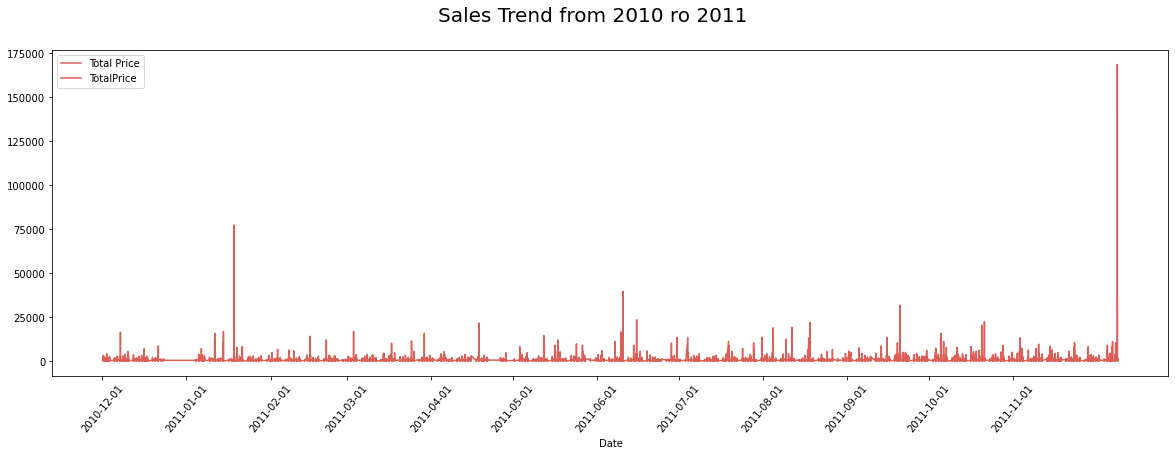

In [88]:
plt.figure(figsize = (20,6)).suptitle('Sales Trend from 2010 ro 2011', fontsize =20)
lp= sns.lineplot(data= sales_trend, label= 'Total Price')
plt.xticks(dates, rotation = 50)
plt.show()

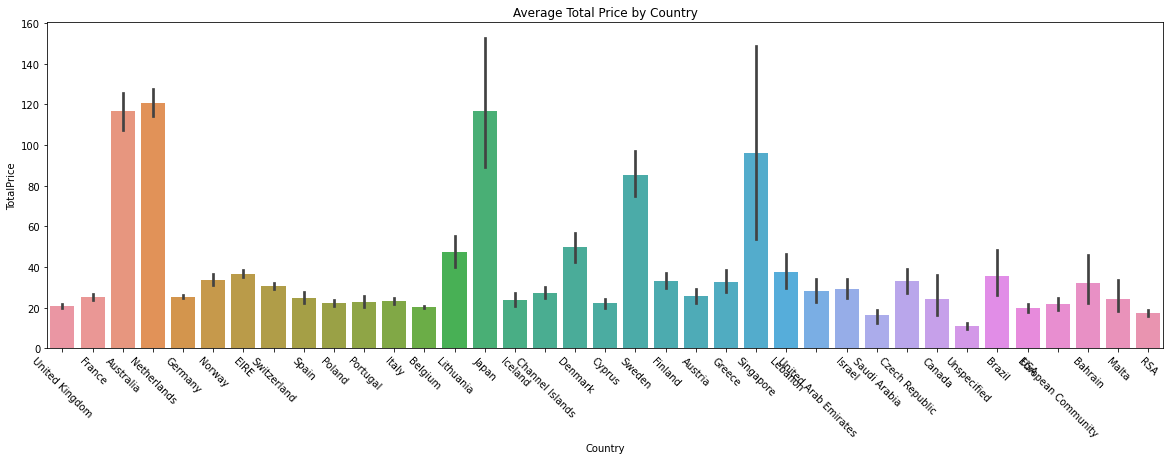

In [83]:
plt.figure(figsize=(20, 6))
bar = sns.barplot(x = 'Country', y= 'TotalPrice',
               data = data, estimator=np.mean );
bar.set(title = 'Average Total Price by Country')
bar.set_xticklabels(bar.get_xticklabels(), rotation = -45);

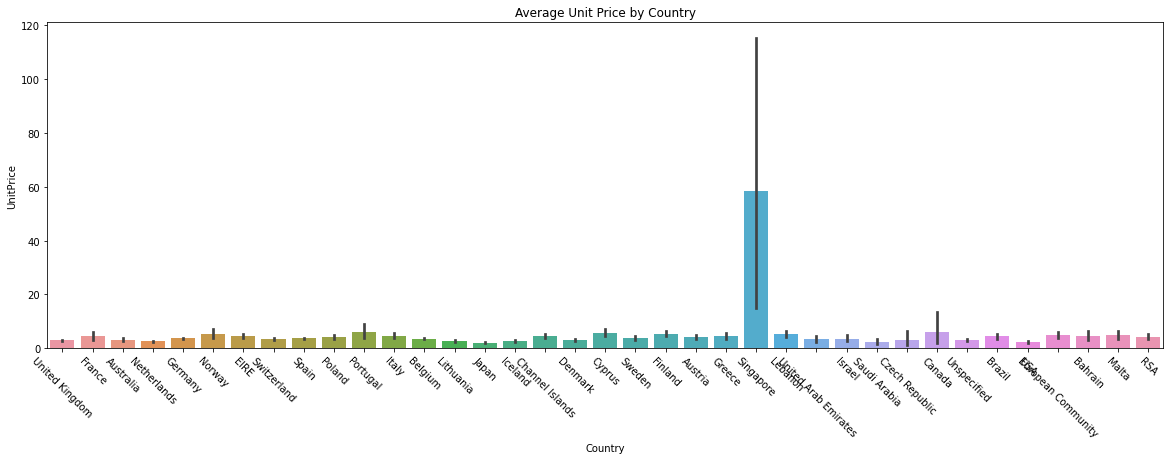

In [86]:
plt.figure(figsize=(20, 6))
bar = sns.barplot(x = 'Country', y= 'UnitPrice',
               data = data, estimator=np.mean );
bar.set(title = 'Average Unit Price by Country')
bar.set_xticklabels(bar.get_xticklabels(), rotation = -45);

From the graphs above, we can see that Australia, Netherlands,Japan and Singapore(THE  recored sales of the most expensive items.
This is because the average of total price of items puchased were much higher in these countries compared to the others

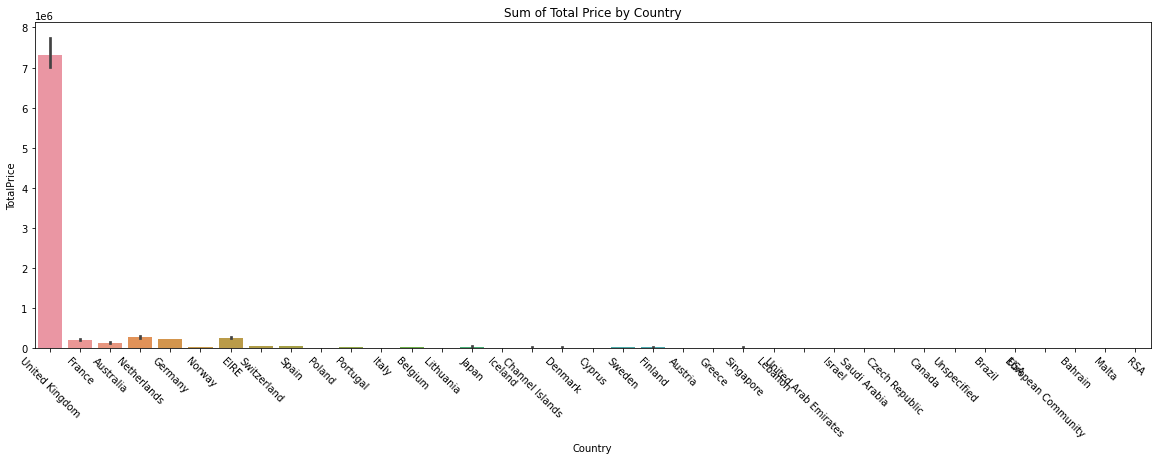

In [85]:
plt.figure(figsize=(20, 6))
bar = sns.barplot(x = 'Country', y= 'UnitPrice',
               data = data, estimator=np.sum);
bar.set(title = 'Sum of Total Price by Country')
bar.set_xticklabels(bar.get_xticklabels(), rotation = -45);

As expected, United Kingdom recorded the most sales, however items purchaed were cheaper as indicated by the relatively low average of total price.